<a href="https://colab.research.google.com/github/FatemehAbbasi166/Pathrise_Company_Project/blob/main/Feature_Engineering_pathrise_project__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [218]:
from google.colab import files

In [219]:
uploaded= files.upload()

Saving Data_Pathrise.csv to Data_Pathrise (2).csv


In [220]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [221]:
# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)

In [222]:
df=pd.read_csv('Data_Pathrise.csv')

In [223]:
df.head()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

In [225]:
df.dtypes

id                               int64
pathrise_status                 object
primary_track                   object
cohort_tag                      object
program_duration_days          float64
placed                           int64
employment_status               object
highest_level_of_education      object
length_of_job_search            object
biggest_challenge_in_search     object
professional_experience         object
work_authorization_status       object
number_of_interviews           float64
number_of_applications           int64
gender                          object
race                            object
dtype: object

In [226]:
#Number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

program_duration_days          616
gender                         492
work_authorization_status      284
employment_status              229
professional_experience        222
number_of_interviews           218
length_of_job_search            74
highest_level_of_education      58
biggest_challenge_in_search     24
race                            18
cohort_tag                       8
id                               0
pathrise_status                  0
primary_track                    0
placed                           0
number_of_applications           0
dtype: int64

In [227]:
# The number of rows that have missing values
df[df.isnull().any(axis=1)]

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
8,9,Active,SWE,AUG19B,NaN,0,Student,Master's Degree,Less than one month,Technical interviewing,1-2 years,F1 Visa/CPT,1.0,5,Male,East Asian or Asian American
14,15,Active,PSO,DEC19A,NaN,0,Employed Full-Time,Bachelor's Degree,1-2 months,Technical skills,1-2 years,Citizen,2.0,35,Male,Non-Hispanic White or Euro-American
15,16,Active,PSO,JAN20A,NaN,0,Employed Full-Time,Bachelor's Degree,3-5 months,Getting past mid-stage interviews,Less than one year,Citizen,1.0,25,Male,South Asian or Indian American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2536,2537,Active,Design,FEB20B,NaN,0,Employed Full-Time,Bachelor's Degree,Over a year,Hearing back on my applications,5+ years,NaN,0.0,10,NaN,South Asian or Indian American
2537,2538,Active,SWE,JAN19B,NaN,0,Contractor,Bachelor's Degree,1-2 months,Getting past final round interviews,1-2 years,NaN,1.0,70,Male,Non-Hispanic White or Euro-American
2540,2541,Withdrawn (Failed),Data,JAN19B,488.0,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American
2541,2542,Active,SWE,SEP18C,NaN,0,Contractor,Bachelor's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,1.0,30,Female,Non-Hispanic White or Euro-American


In [228]:
# Check for unique values in categorical columns
for column in df.select_dtypes(include='object').columns:
    print(f"{column}: {df[column].unique()}")

pathrise_status: ['Active' 'Closed Lost' 'Placed' 'Withdrawn (Failed)' 'Withdrawn (Trial)'
 'Withdrawn' 'Deferred' 'Break' 'MIA']
primary_track: ['SWE' 'PSO' 'Design' 'Data' 'Web' 'Marketing']
cohort_tag: ['OCT19A' 'JAN20A' 'AUG19B' 'AUG19A' 'SEP19A' 'AUG19C' 'DEC19A' 'FEB20A'
 'NOV19A' 'NOV19B' 'JAN20B' 'FEB20B' 'JUL19B' 'APR20A' 'OCT18A' 'SEP18C'
 'OCT18B' 'JAN19A' 'MAR19A' 'FEB19A' 'FEB19B' 'APR19A' 'AUG18A' 'DEC18A'
 'MAR19B' 'JAN19B' 'JUN19B' 'SEP18B' 'NOV18A' 'SEP18A' 'APR19B' 'MAY19A'
 'JUL19A' 'JUN19A' 'FEB18A' 'JUN18A' 'MAR18A' 'APR18A' 'APR18B' 'MAY18A'
 'OCT21A' 'SEP19B' 'MAR20A' 'MAY19B' 'FEB20a' 'OCT19B' 'JAN18A' nan]
employment_status : ['Unemployed' 'Employed Part-Time' 'Contractor' 'Employed Full-Time'
 'Student' nan]
highest_level_of_education: ["Bachelor's Degree" 'Some College, No Degree' "Master's Degree" nan
 'Doctorate or Professional Degree' 'High School Graduate'
 'GED or equivalent' 'Some High School']
length_of_job_search: ['3-5 months' 'Less than one month' '

In [229]:
df.drop('id',axis=1,inplace=True)

In [230]:
df['pathrise_status'].value_counts()

pathrise_status
Placed                956
Active                532
Withdrawn             398
Withdrawn (Trial)     276
Closed Lost           182
Withdrawn (Failed)     82
MIA                    52
Deferred               34
Break                  32
Name: count, dtype: int64

In [116]:
#check the column pathrise_status(Active,Break,MI), these columns have NaN program duration days.
x=len(df[df['pathrise_status']=='Active'])
y=len(df[df['pathrise_status']=='MIA'])
z=len(df[df['pathrise_status']=='Break'])
Sum=x+y+z
Sum

616

In [231]:
df['program_duration_days'].isnull().sum()

616

In [232]:
tags=['Active','MIA','Break']
df_days=df[df['pathrise_status'].isin(tags)]
df_days['pathrise_status'].value_counts()

pathrise_status
Active    532
MIA        52
Break      32
Name: count, dtype: int64

In [233]:
df_days.shape

(616, 15)

In [234]:
df['cohort_tag'].unique()

array(['OCT19A', 'JAN20A', 'AUG19B', 'AUG19A', 'SEP19A', 'AUG19C',
       'DEC19A', 'FEB20A', 'NOV19A', 'NOV19B', 'JAN20B', 'FEB20B',
       'JUL19B', 'APR20A', 'OCT18A', 'SEP18C', 'OCT18B', 'JAN19A',
       'MAR19A', 'FEB19A', 'FEB19B', 'APR19A', 'AUG18A', 'DEC18A',
       'MAR19B', 'JAN19B', 'JUN19B', 'SEP18B', 'NOV18A', 'SEP18A',
       'APR19B', 'MAY19A', 'JUL19A', 'JUN19A', 'FEB18A', 'JUN18A',
       'MAR18A', 'APR18A', 'APR18B', 'MAY18A', 'OCT21A', 'SEP19B',
       'MAR20A', 'MAY19B', 'FEB20a', 'OCT19B', 'JAN18A', nan],
      dtype=object)

In [235]:
df['cohort_tag'].value_counts()

cohort_tag
JAN19A    132
JAN20A    124
DEC18A    116
FEB20A    108
AUG19C     88
OCT18B     84
OCT18A     82
AUG19B     82
JAN20B     82
JAN19B     74
MAR19A     74
OCT19A     68
SEP19B     66
JUL19A     66
JUN19B     64
DEC19A     64
FEB19A     64
NOV18A     62
NOV19A     62
SEP19A     60
AUG19A     60
OCT19B     54
SEP18C     54
JUN19A     54
SEP18B     50
AUG18A     50
SEP18A     48
APR19A     48
JUN18A     48
JUL19B     44
MAR19B     44
FEB19B     42
NOV19B     40
APR19B     34
MAY18A     32
MAR18A     30
APR18B     30
FEB18A     30
FEB20B     28
APR18A     24
MAY19B     20
MAY19A     18
MAR20A     10
JAN18A     10
APR20A      6
FEB20a      4
OCT21A      2
Name: count, dtype: int64

In [236]:
df['cohort_tag'].replace(np.nan,'JAN19A',inplace=True)

In [237]:
Capital_letters = lambda x: str(x).upper()
df['cohort_tag'] = df['cohort_tag'].apply(Capital_letters)
df['cohort_tag'].unique()

array(['OCT19A', 'JAN20A', 'AUG19B', 'AUG19A', 'SEP19A', 'AUG19C',
       'DEC19A', 'FEB20A', 'NOV19A', 'NOV19B', 'JAN20B', 'FEB20B',
       'JUL19B', 'APR20A', 'OCT18A', 'SEP18C', 'OCT18B', 'JAN19A',
       'MAR19A', 'FEB19A', 'FEB19B', 'APR19A', 'AUG18A', 'DEC18A',
       'MAR19B', 'JAN19B', 'JUN19B', 'SEP18B', 'NOV18A', 'SEP18A',
       'APR19B', 'MAY19A', 'JUL19A', 'JUN19A', 'FEB18A', 'JUN18A',
       'MAR18A', 'APR18A', 'APR18B', 'MAY18A', 'OCT21A', 'SEP19B',
       'MAR20A', 'MAY19B', 'OCT19B', 'JAN18A'], dtype=object)

In [238]:
df['cohort_tag'].value_counts()

cohort_tag
JAN19A    140
JAN20A    124
DEC18A    116
FEB20A    112
AUG19C     88
OCT18B     84
OCT18A     82
AUG19B     82
JAN20B     82
JAN19B     74
MAR19A     74
OCT19A     68
SEP19B     66
JUL19A     66
JUN19B     64
DEC19A     64
FEB19A     64
NOV18A     62
NOV19A     62
SEP19A     60
AUG19A     60
OCT19B     54
SEP18C     54
JUN19A     54
SEP18B     50
AUG18A     50
SEP18A     48
APR19A     48
JUN18A     48
JUL19B     44
MAR19B     44
FEB19B     42
NOV19B     40
APR19B     34
MAY18A     32
FEB18A     30
MAR18A     30
APR18B     30
FEB20B     28
APR18A     24
MAY19B     20
MAY19A     18
MAR20A     10
JAN18A     10
APR20A      6
OCT21A      2
Name: count, dtype: int64

In [239]:
df['cohort_tag_month'] = df['cohort_tag'].apply(lambda x: x[:-3]) #Remove Year and Week

In [240]:
df['cohort_tag_month'].value_counts()

cohort_tag_month
JAN    430
OCT    290
AUG    280
SEP    278
FEB    276
DEC    180
JUN    166
NOV    164
MAR    158
APR    142
JUL    110
MAY     70
Name: count, dtype: int64

In [241]:
df.drop('cohort_tag',axis=1,inplace=True)

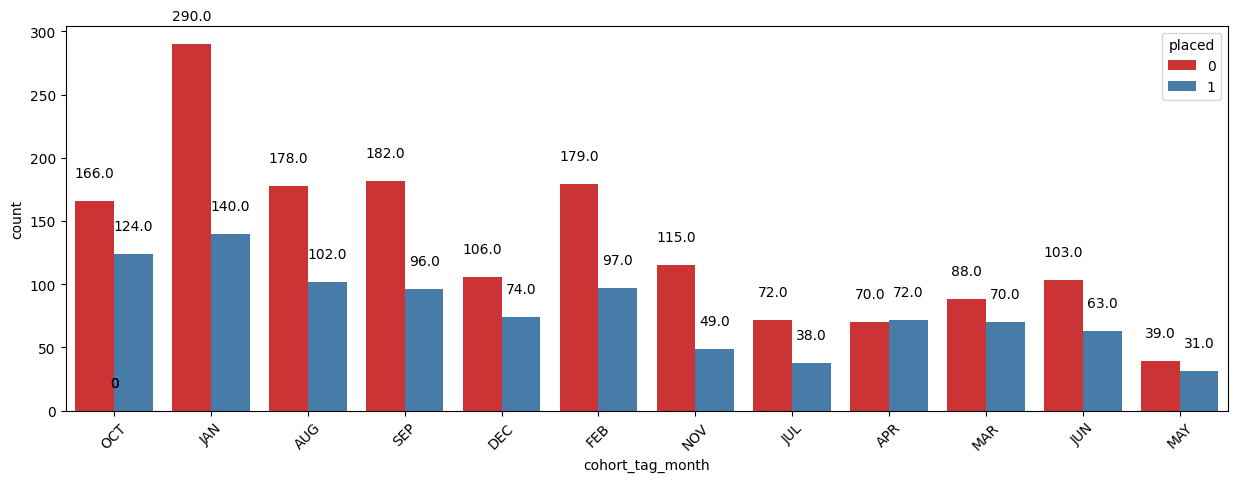

In [243]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(x='cohort_tag_month', data=df , hue='placed',palette='Set1')
ax.tick_params(axis='x', rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')


In [244]:
df_days['program_duration_days'].value_counts()

Series([], Name: count, dtype: int64)

In [245]:
df.dropna(subset=['program_duration_days'],inplace=True)

In [246]:
df['program_duration_days'].isnull().sum() # With removing NaN values from program duration days, Active, MIA, Break from pathrise status will be removed.

0

In [247]:
df.isnull().sum().sort_values(ascending=False)

gender                         371
work_authorization_status      221
employment_status              182
number_of_interviews           172
professional_experience        161
length_of_job_search            66
highest_level_of_education      42
biggest_challenge_in_search     20
race                            13
pathrise_status                  0
primary_track                    0
program_duration_days            0
placed                           0
number_of_applications           0
cohort_tag_month                 0
dtype: int64

In [248]:
df['pathrise_status'].value_counts()

pathrise_status
Placed                956
Withdrawn             398
Withdrawn (Trial)     276
Closed Lost           182
Withdrawn (Failed)     82
Deferred               34
Name: count, dtype: int64

<ipython-input-249-81094ccb19e1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="pathrise_status", data=df, palette='Set1')


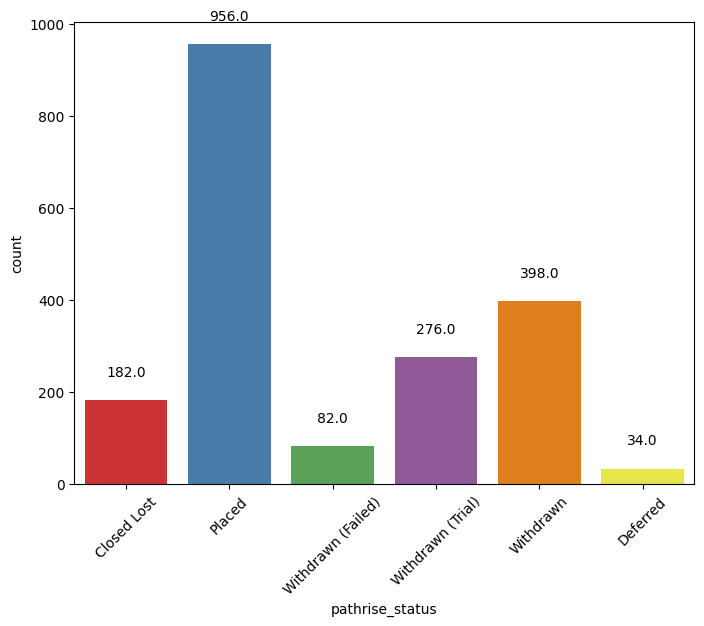

In [249]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x="pathrise_status", data=df, palette='Set1')
ax.tick_params(axis='x', rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

In [250]:
df

,pathrise_status,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,cohort_tag_month
2,Closed Lost,Design,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American,AUG
3,Closed Lost,PSO,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify,AUG
4,Placed,SWE,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American,AUG
5,Closed Lost,SWE,0.0,0,Employed Full-Time,Master's Degree,1-2 months,Technical interviewing,3-4 years,Green Card,5.0,100,Male,East Asian or Asian American,AUG
6,Closed Lost,SWE,0.0,0,Employed Full-Time,Master's Degree,Less than one month,Getting past phone screens,3-4 years,Green Card,0.0,9,Male,"Black, Afro-Caribbean, or African American",AUG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2535,Closed Lost,PSO,0.0,0,Employed Full-Time,Master's Degree,NaN,Figuring out which jobs to apply for,3-4 years,Citizen,0.0,20,NaN,South Asian or Indian American,SEP
2538,Withdrawn,SWE,118.0,0,Employed Part-Time,Master's Degree,Less than one month,Lack of relevant experience,5+ years,Other,1.0,25,Decline to Self Identify,Middle Eastern or Arab American,JUL
2539,Withdrawn (Failed),Design,457.0,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15,Male,Non-Hispanic White or Euro-American,JUN
2540,Withdrawn (Failed),Data,488.0,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American,JAN


In [251]:
# Reset the index
df.reset_index(drop=True, inplace=True)
df

,pathrise_status,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,cohort_tag_month
0,Closed Lost,Design,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American,AUG
1,Closed Lost,PSO,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify,AUG
2,Placed,SWE,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American,AUG
3,Closed Lost,SWE,0.0,0,Employed Full-Time,Master's Degree,1-2 months,Technical interviewing,3-4 years,Green Card,5.0,100,Male,East Asian or Asian American,AUG
4,Closed Lost,SWE,0.0,0,Employed Full-Time,Master's Degree,Less than one month,Getting past phone screens,3-4 years,Green Card,0.0,9,Male,"Black, Afro-Caribbean, or African American",AUG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,Closed Lost,PSO,0.0,0,Employed Full-Time,Master's Degree,NaN,Figuring out which jobs to apply for,3-4 years,Citizen,0.0,20,NaN,South Asian or Indian American,SEP
1924,Withdrawn,SWE,118.0,0,Employed Part-Time,Master's Degree,Less than one month,Lack of relevant experience,5+ years,Other,1.0,25,Decline to Self Identify,Middle Eastern or Arab American,JUL
1925,Withdrawn (Failed),Design,457.0,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15,Male,Non-Hispanic White or Euro-American,JUN
1926,Withdrawn (Failed),Data,488.0,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American,JAN


In [252]:
df.columns=df.columns.str.strip()

In [253]:
df.columns

Index(['pathrise_status', 'primary_track', 'program_duration_days', 'placed',
       'employment_status', 'highest_level_of_education',
       'length_of_job_search', 'biggest_challenge_in_search',
       'professional_experience', 'work_authorization_status',
       'number_of_interviews', 'number_of_applications', 'gender', 'race',
       'cohort_tag_month'],
      dtype='object')

In [254]:
df["placed"].value_counts()

placed
0    972
1    956
Name: count, dtype: int64

<ipython-input-255-1e547c1a7c18>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="placed", data=df ,palette='husl')


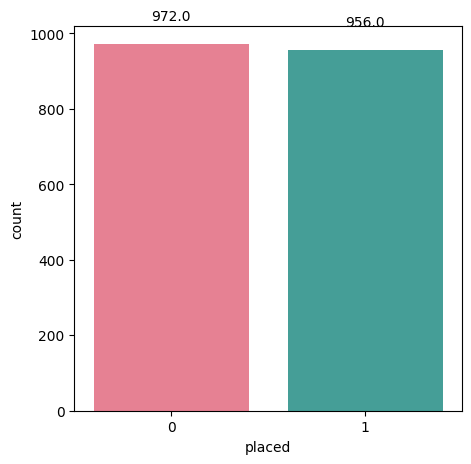

In [255]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.countplot(x="placed", data=df ,palette='husl')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')#???

In [256]:
df["primary_track"].value_counts()

primary_track
SWE          1306
PSO           233
Design        205
Data          178
Web             4
Marketing       2
Name: count, dtype: int64

In [257]:
df['primary_track'].isnull().sum()

0

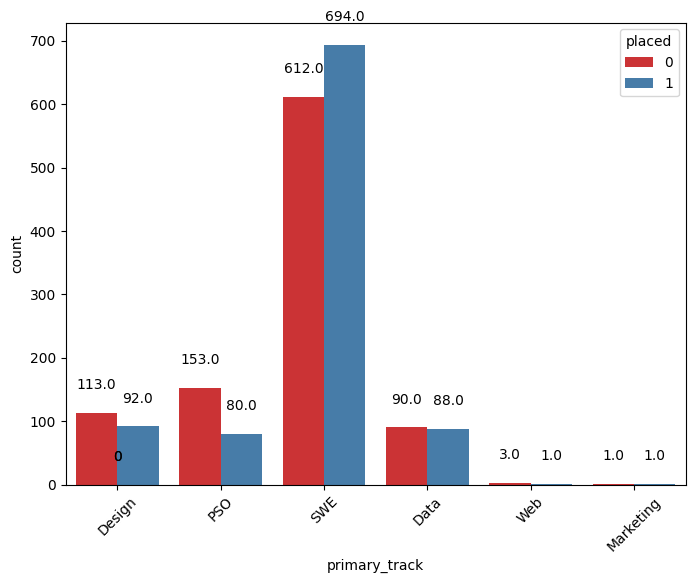

In [258]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x="primary_track", data=df, hue='placed', palette='Set1')
ax.tick_params(axis='x', rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

In [259]:
df['employment_status'].value_counts()

employment_status
Student               579
Unemployed            504
Employed Full-Time    329
Employed Part-Time    199
Contractor            135
Name: count, dtype: int64

In [260]:
df['employment_status'].isnull().sum()

182

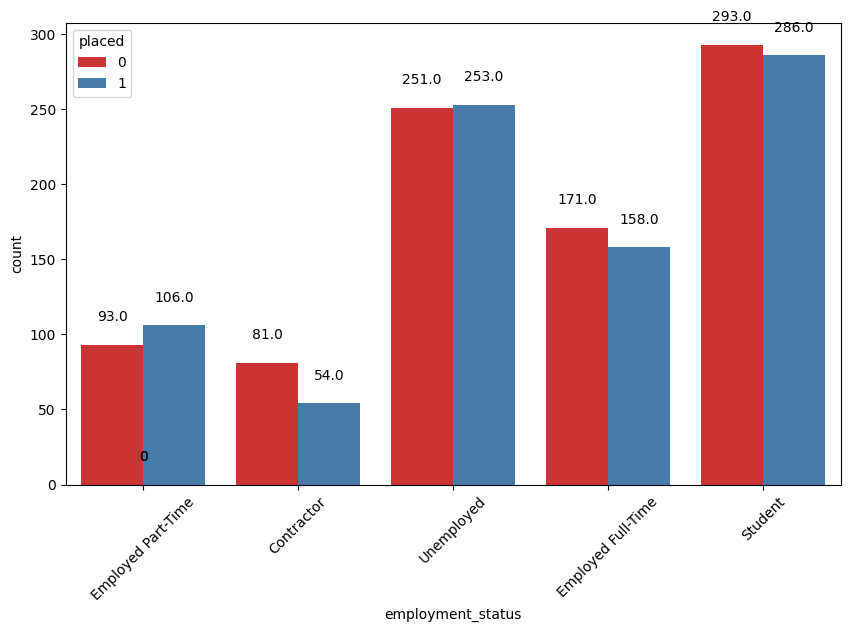

In [261]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x='employment_status', data=df, hue='placed', palette='Set1')
ax.tick_params(axis='x', rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

In [262]:
df['highest_level_of_education'].value_counts()

highest_level_of_education
Bachelor's Degree                   1036
Master's Degree                      605
Doctorate or Professional Degree     104
Some College, No Degree              102
GED or equivalent                     14
Some High School                      13
High School Graduate                  12
Name: count, dtype: int64

In [263]:
df['highest_level_of_education'].isnull().sum()

42

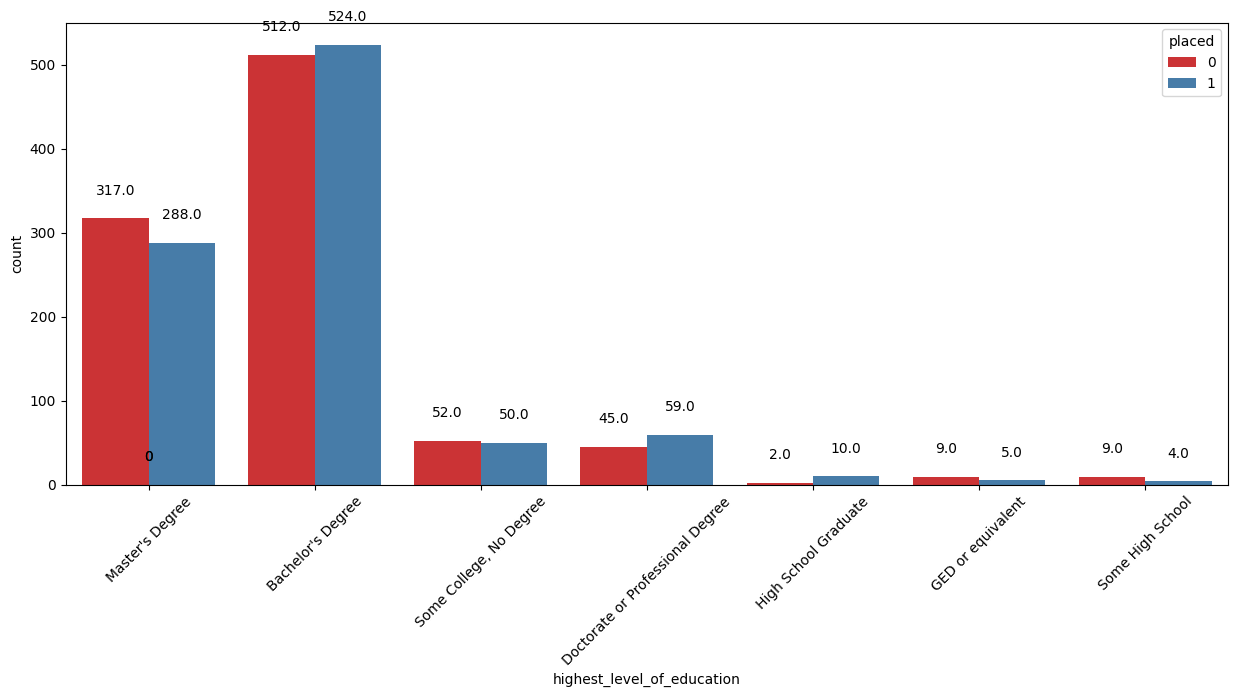

In [264]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(x='highest_level_of_education', data=df , hue='placed',palette='Set1')
ax.tick_params(axis='x', rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

In [265]:
df['length_of_job_search'].value_counts()

length_of_job_search
Less than one month    621
1-2 months             610
3-5 months             372
6 months to a year     171
Over a year             88
Name: count, dtype: int64

In [266]:
df['length_of_job_search'].isnull().sum()

66

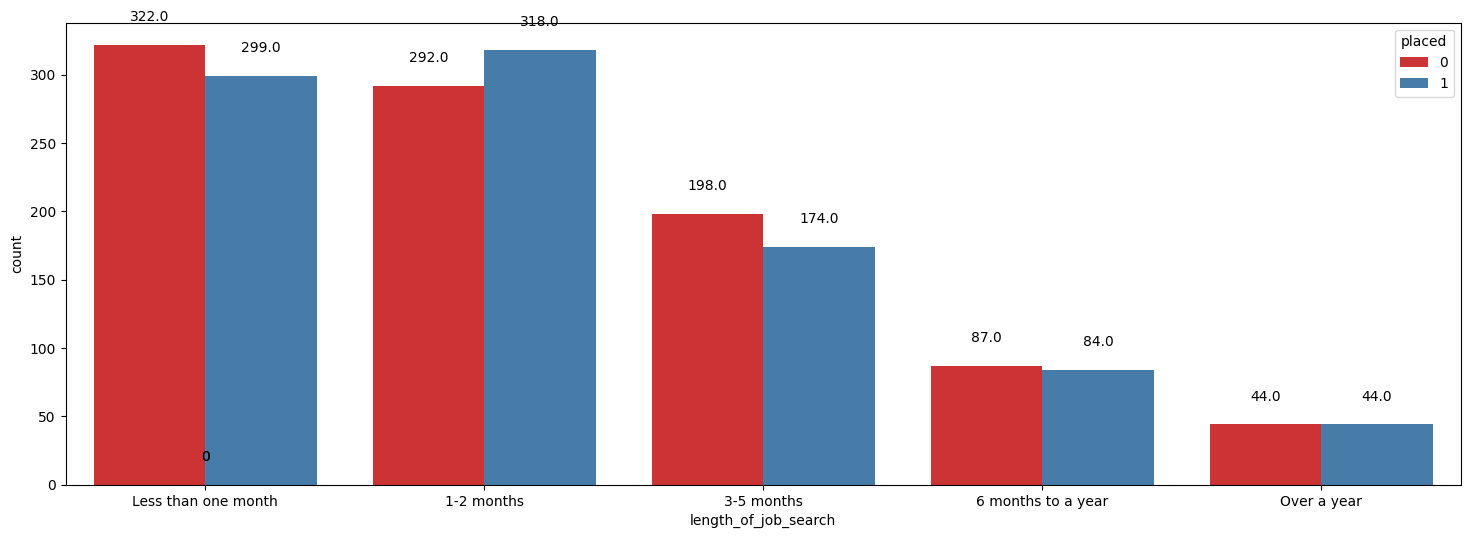

In [267]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x='length_of_job_search', data=df , hue='placed',palette='Set1')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

In [268]:
df['biggest_challenge_in_search'].value_counts()

biggest_challenge_in_search
Hearing back on my applications         737
Getting past final round interviews     234
Technical interviewing                  224
Lack of relevant experience             175
Getting past mid-stage interviews       160
Getting past phone screens              148
Figuring out which jobs to apply for    131
Behavioral interviewing                  43
Resume gap                               30
Technical skills                         26
Name: count, dtype: int64

In [269]:
df['biggest_challenge_in_search'].isna().sum()

20

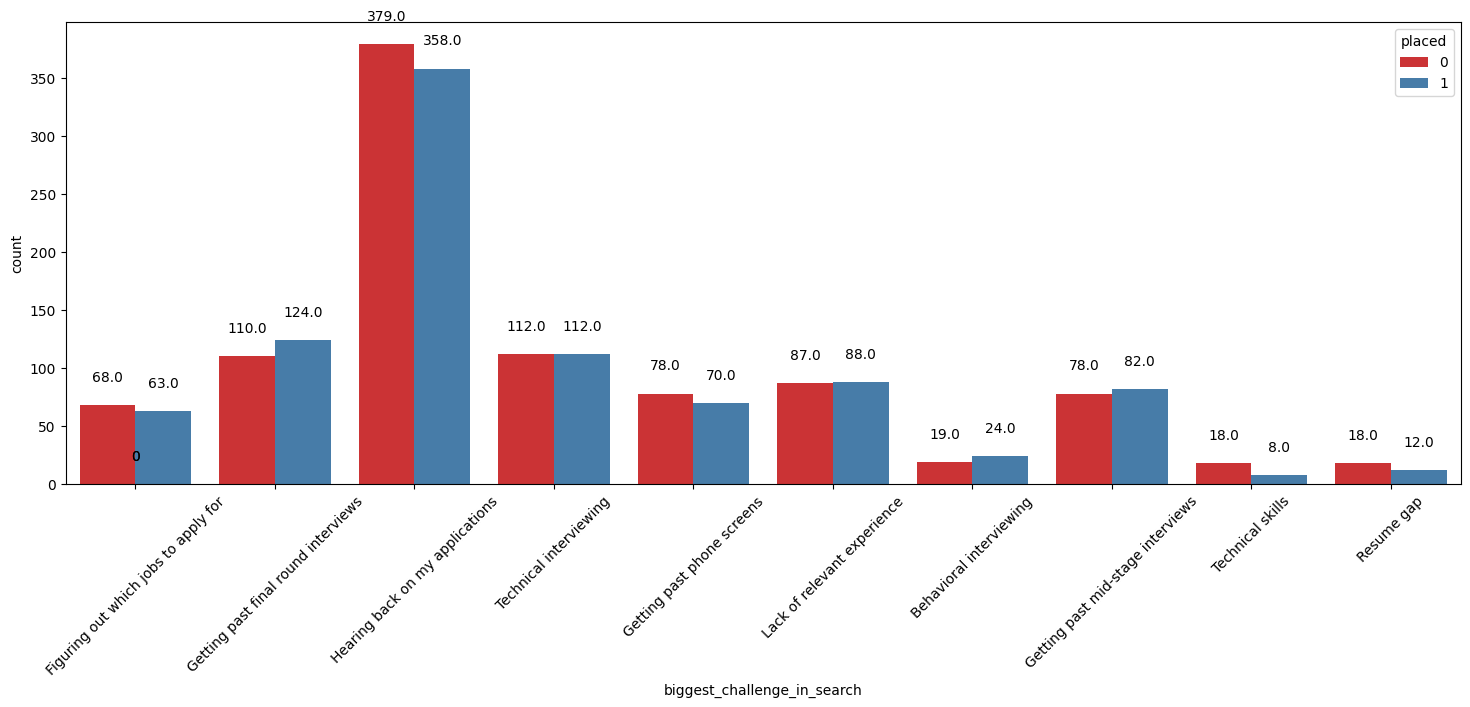

In [270]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x='biggest_challenge_in_search', data=df , hue='placed',palette='Set1')
ax.tick_params(axis='x', rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

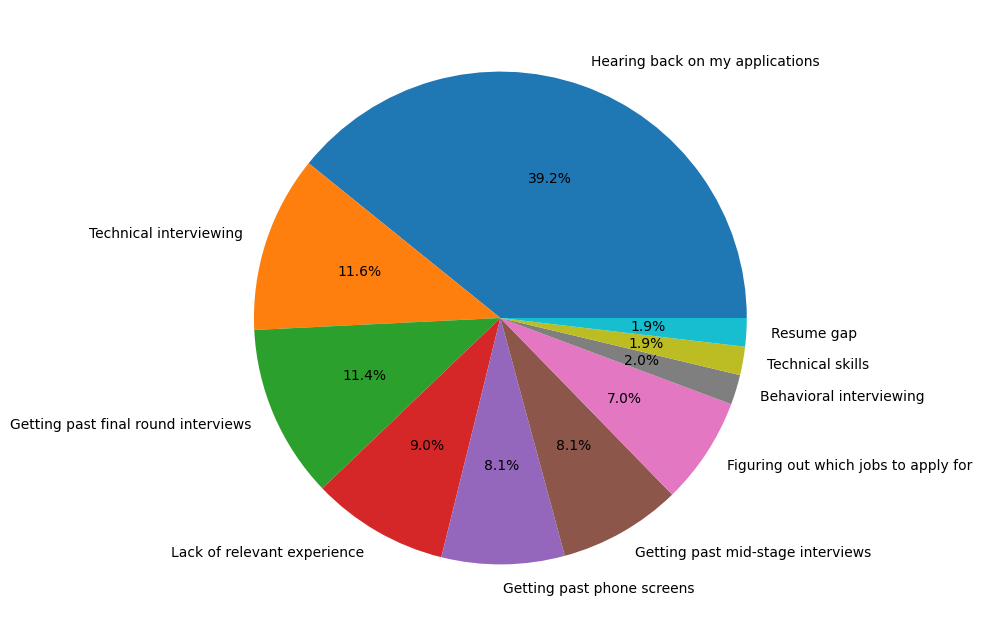

In [271]:
df_failed=df[df['placed']==0]
df_success=df[df['placed']==1]

#Get the count of each category
counts = df_failed['biggest_challenge_in_search'].value_counts()

# Create a new figure with a specified size (width, height) in inches
plt.figure(figsize=(8,8))

# Create a pie chart
plt.pie(counts, labels = counts.index, autopct='%1.1f%%')

# Display the plot
plt.show()

In [272]:
df['professional_experience'].value_counts()

professional_experience
1-2 years             640
Less than one year    478
3-4 years             444
5+ years              205
Name: count, dtype: int64

In [273]:
df['professional_experience'].isna().sum()

161

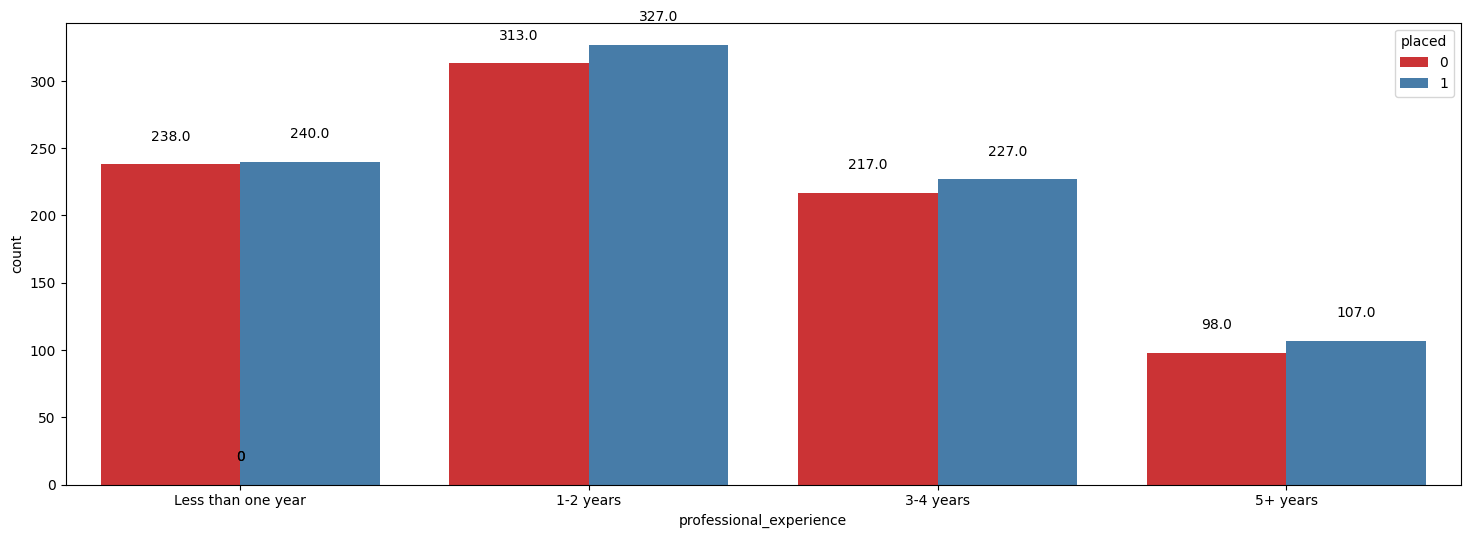

In [274]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x='professional_experience', data=df , hue='placed',palette='Set1')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

In [275]:
df['work_authorization_status'].value_counts()

work_authorization_status
Citizen           831
F1 Visa/OPT       488
Green Card        142
F1 Visa/CPT        97
Other              82
H1B                38
Canada Citizen     20
STEM OPT            5
Not Authorized      4
Name: count, dtype: int64

In [276]:
df['work_authorization_status'].isna().sum()

221

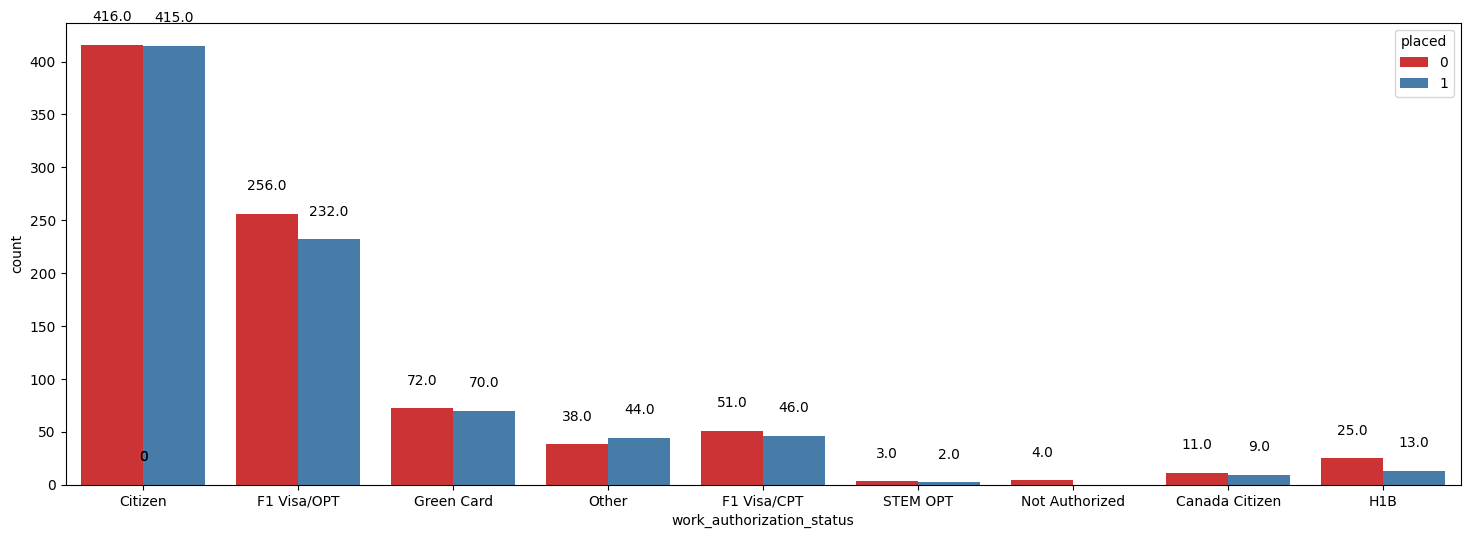

In [277]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x='work_authorization_status', data=df , hue='placed',palette='Set1')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

In [278]:
df['gender'].value_counts()

gender
Male                        1134
Female                       410
Decline to Self Identify      10
Non-Binary                     3
Name: count, dtype: int64

In [279]:
df['gender'].isna().sum()

371

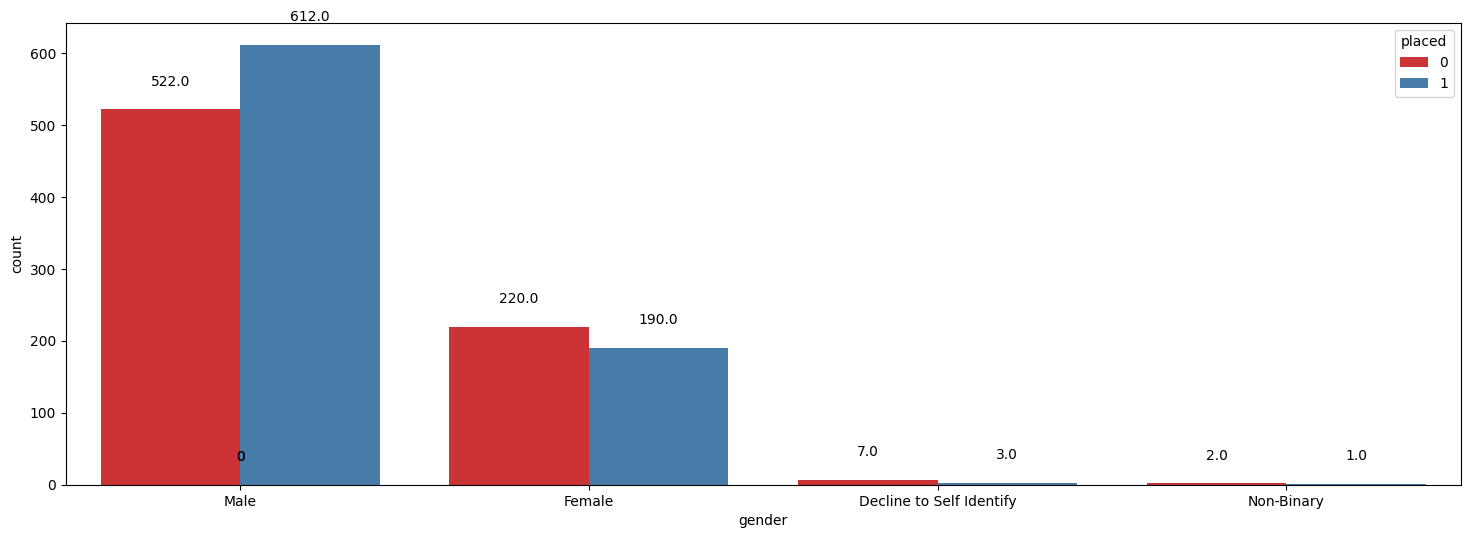

In [280]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x='gender', data=df , hue='placed',palette='Set1')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

In [281]:
df['race'].value_counts()

race
East Asian or Asian American                  703
South Asian or Indian American                420
Non-Hispanic White or Euro-American           414
Latino or Hispanic American                   119
Black, Afro-Caribbean, or African American     91
Two or More Races                              68
Middle Eastern or Arab American                52
Decline to Self Identify                       45
Native American or Alaskan Native               3
Name: count, dtype: int64

In [282]:
df['race'].isna().sum()

13

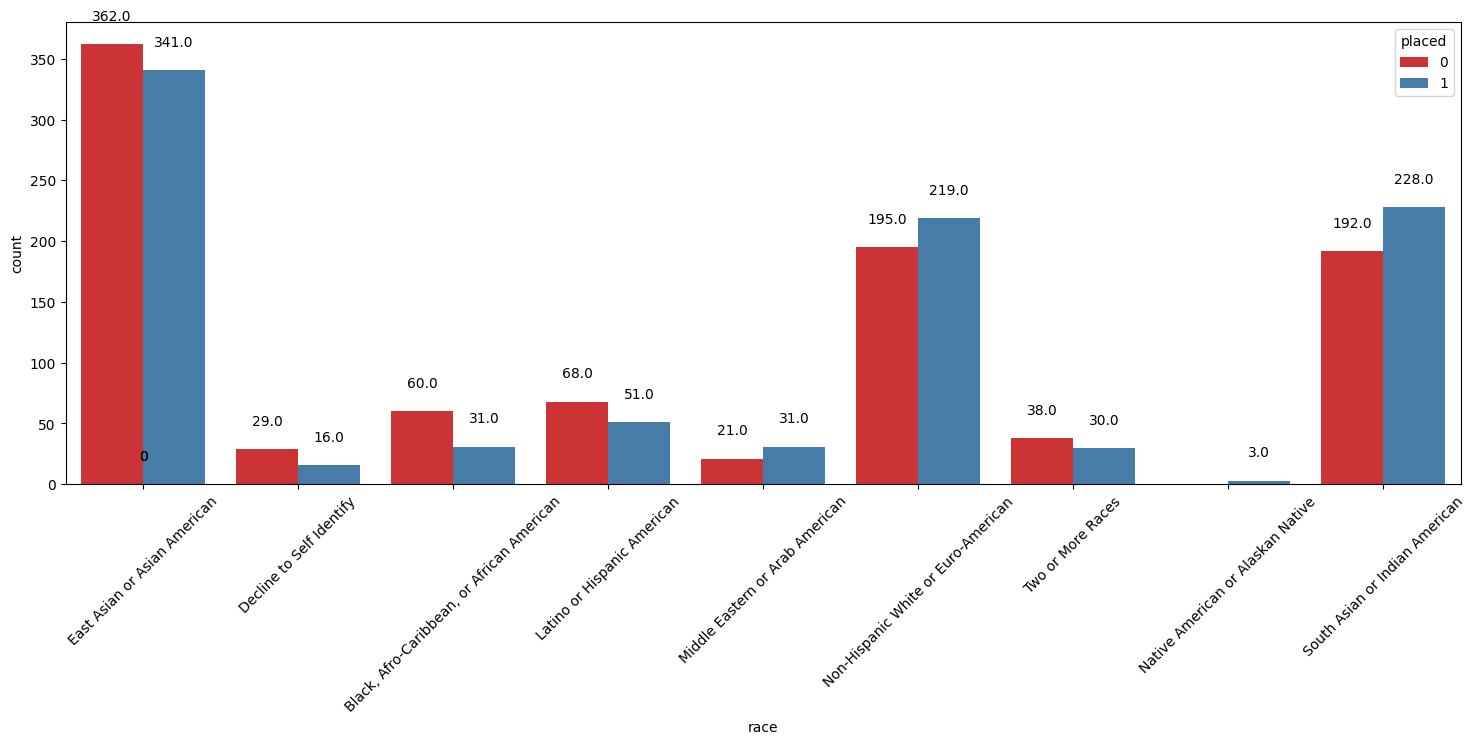

In [283]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x='race', data=df , hue='placed',palette='Set1')
ax.tick_params(axis='x', rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

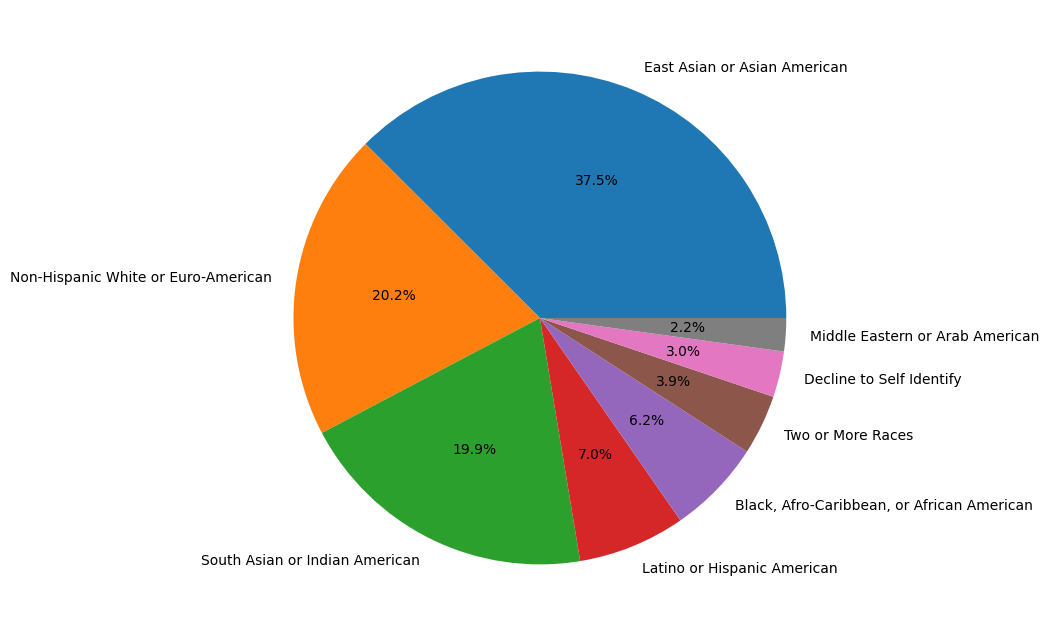

In [284]:
df_failed=df[df['placed']==0]
df_success=df[df['placed']==1]

#Get the count of each category
counts = df_failed['race'].value_counts()

# Create a new figure with a specified size (width, height) in inches
plt.figure(figsize=(8,8))

# Create a pie chart
plt.pie(counts, labels = counts.index, autopct='%1.1f%%')

# Display the plot
plt.show()

In [285]:
df_num=df[['program_duration_days','number_of_interviews','number_of_applications','placed']]
print(df_num.info())
print(df_num.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   program_duration_days   1928 non-null   float64
 1   number_of_interviews    1756 non-null   float64
 2   number_of_applications  1928 non-null   int64  
 3   placed                  1928 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 60.4 KB
None
program_duration_days       0
number_of_interviews      172
number_of_applications      0
placed                      0
dtype: int64


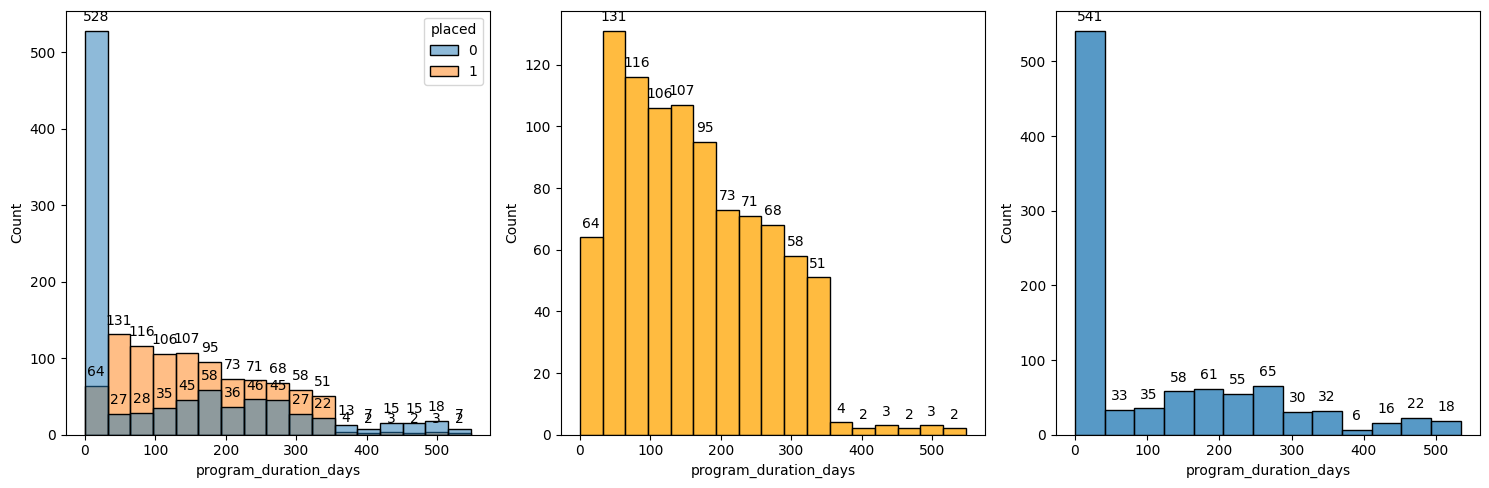

In [286]:
# Create subplot grid
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot distributions
sns.histplot(x='program_duration_days', data=df_num, hue='placed', ax=axes[0])

for p in axes[0].patches:
    axes[0].annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

sns.histplot(x='program_duration_days', data=df_success, color='orange', ax=axes[1])

for p in axes[1].patches:
    axes[1].annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

sns.histplot(x='program_duration_days', data=df_failed, ax=axes[2])

for p in axes[2].patches:
    axes[2].annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust layout
plt.tight_layout()
plt.show()




<Axes: xlabel='program_duration_days'>

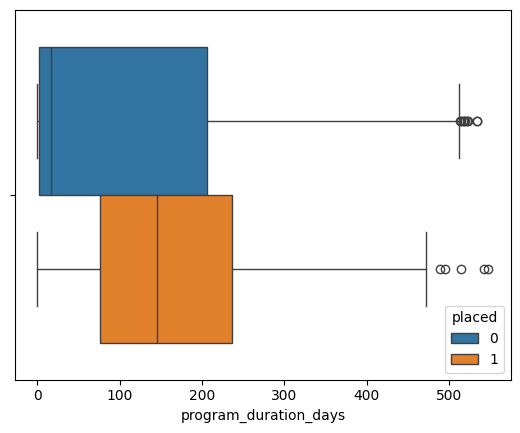

In [287]:
sns.boxplot(x='program_duration_days', data=df,hue='placed')

<Axes: xlabel='program_duration_days'>

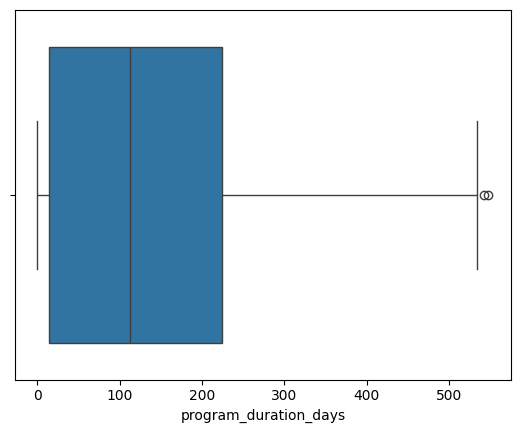

In [288]:
sns.boxplot(x='program_duration_days', data=df)

In [289]:
from scipy import stats

# Assuming 'df' is your DataFrame and 'column1' is the column from which you want to remove outliers
Q1 = df['program_duration_days'].quantile(0.25)
Q3 = df['program_duration_days'].quantile(0.75)
IQR = Q3 - Q1

# Get a boolean mask for outliers
outliers = (df['program_duration_days'] < (Q1 - 1.5 * IQR)) | (df['program_duration_days'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

<Axes: xlabel='program_duration_days'>

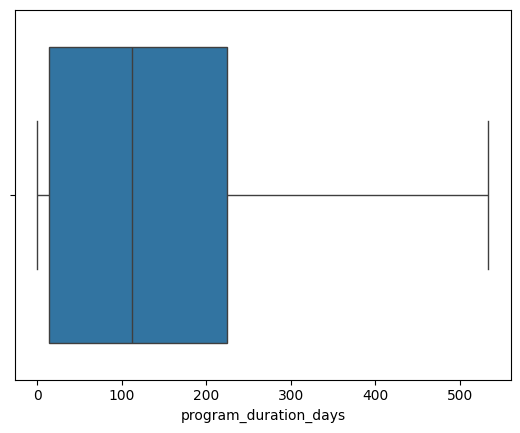

In [290]:
sns.boxplot(x='program_duration_days', data=df)

<Axes: xlabel='number_of_applications'>

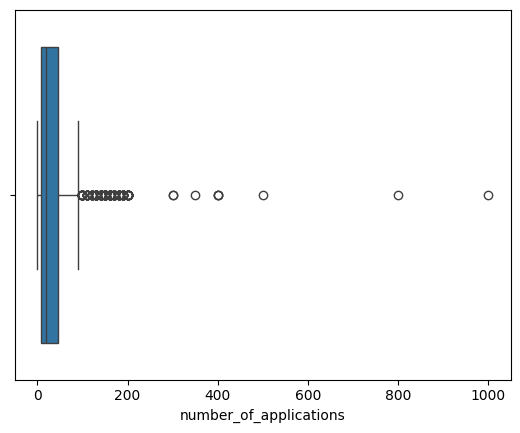

In [291]:
sns.boxplot(x='number_of_applications', data=df)

In [292]:
from scipy import stats

# Assuming 'df' is your DataFrame and 'column1' is the column from which you want to remove outliers
Q1 = df['number_of_applications'].quantile(0.25)
Q3 = df['number_of_applications'].quantile(0.75)
IQR = Q3 - Q1

# Get a boolean mask for outliers
outliers = (df['number_of_applications'] < (Q1 - 1.5 * IQR)) | (df['number_of_applications'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

<Axes: xlabel='number_of_applications'>

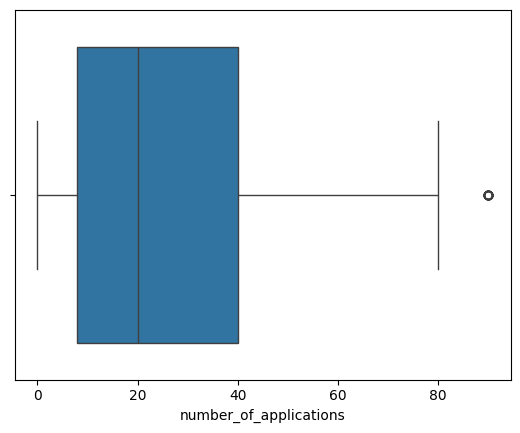

In [293]:
sns.boxplot(x='number_of_applications', data=df)

In [294]:
from scipy import stats

# Assuming 'df' is your DataFrame and 'column1' is the column from which you want to remove outliers
Q1 = df['number_of_applications'].quantile(0.25)
Q3 = df['number_of_applications'].quantile(0.75)
IQR = Q3 - Q1

# Get a boolean mask for outliers
outliers = (df['number_of_applications'] < (Q1 - 1.5 * IQR)) | (df['number_of_applications'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

<Axes: xlabel='number_of_applications'>

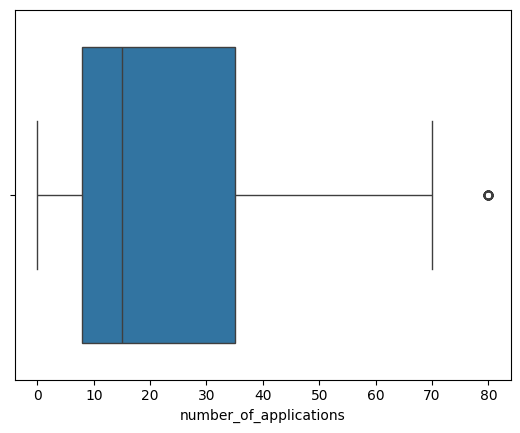

In [295]:
sns.boxplot(x='number_of_applications', data=df)

<Axes: xlabel='number_of_interviews'>

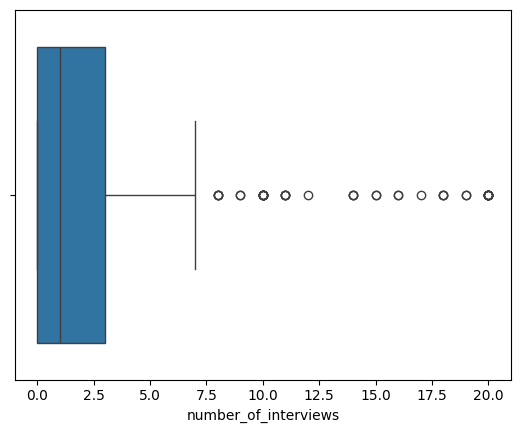

In [296]:
sns.boxplot(x='number_of_interviews', data=df)

In [297]:
from scipy import stats

# Assuming 'df' is your DataFrame and 'column1' is the column from which you want to remove outliers
Q1 = df['number_of_interviews'].quantile(0.25)
Q3 = df['number_of_interviews'].quantile(0.75)
IQR = Q3 - Q1

# Get a boolean mask for outliers
outliers = (df['number_of_interviews'] < (Q1 - 1.5 * IQR)) | (df['number_of_interviews'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

<Axes: xlabel='number_of_interviews'>

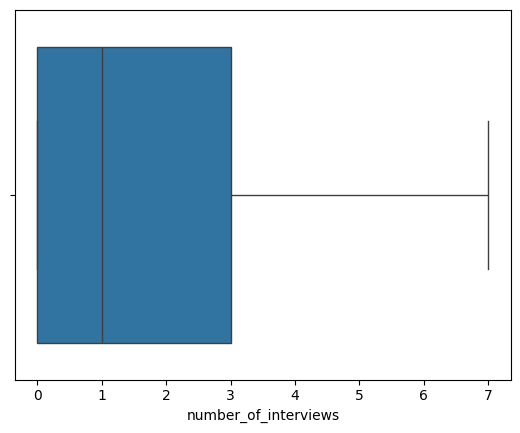

In [298]:
sns.boxplot(x='number_of_interviews', data=df)

In [300]:
#Number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

gender                         329
work_authorization_status      205
employment_status              167
number_of_interviews           155
professional_experience        146
length_of_job_search            64
highest_level_of_education      37
biggest_challenge_in_search     17
race                            10
pathrise_status                  0
primary_track                    0
program_duration_days            0
placed                           0
number_of_applications           0
cohort_tag_month                 0
dtype: int64

In [301]:
# Mapping categories
education_mapping = {
    "Bachelor's Degree": "Undergraduate",
    "Master's Degree": "Graduate",
    "Some College, No Degree": "Undergraduate",
    "Doctorate or Professional Degree": "Postgraduate",
    "High School Graduate": "Diploma",
    "Some High School": "Diploma",
    "GED or equivalent": "Diploma"
}

# Replace values in the 'highest_level_of_education' column
df['highest_level_of_education'] = df['highest_level_of_education'].replace(education_mapping)

# Verify the changes
print(df['highest_level_of_education'].value_counts())

highest_level_of_education
Undergraduate    1008
Graduate          530
Postgraduate       92
Diploma            34
Name: count, dtype: int64


In [303]:
# Mapping categories
category_mapping = {
    'Hearing back on my applications': 'Application Process',
    'Getting past final round interviews': 'Interview Process',
    'Technical interviewing': 'Interview Process',
    'Lack of relevant experience': 'Experience Gap',
    'Getting past mid-stage interviews': 'Interview Process',
    'Figuring out which jobs to apply for': 'Job Selection',
    'Getting past phone screens': 'Interview Process',
    'Behavioral interviewing': 'Interview Process',
    'Resume gap': 'Experience Gap',
    'Technical skills': 'Skill Gap'
}

# Create broader categories
df['biggest_challenge_in_search'] = df['biggest_challenge_in_search'].replace(category_mapping)
# Verify the changes
print(df['biggest_challenge_in_search'].value_counts())

biggest_challenge_in_search
Interview Process      712
Application Process    656
Experience Gap         177
Job Selection          114
Skill Gap               25
Name: count, dtype: int64


In [304]:
df['employment_status'].fillna('Unknown', inplace=True)

df['highest_level_of_education'].fillna('Undergraduate', inplace=True)

df['length_of_job_search'].fillna('Less than one month', inplace=True)

df['biggest_challenge_in_search'].fillna('Interview Process', inplace=True)

df['professional_experience'].fillna('Unknown', inplace=True)

df['work_authorization_status'].fillna('Citizen', inplace=True)

df['gender'].fillna('Decline to Self Identify', inplace=True)

df['race'].fillna('Decline to Self Identify', inplace=True)

# Fill missing values for numerical columns with the mean or median
df['number_of_interviews'].fillna(df['number_of_interviews'].mean(), inplace=True)

In [306]:
df.isnull().sum().sort_values(ascending=False)

pathrise_status                0
primary_track                  0
program_duration_days          0
placed                         0
employment_status              0
highest_level_of_education     0
length_of_job_search           0
biggest_challenge_in_search    0
professional_experience        0
work_authorization_status      0
number_of_interviews           0
number_of_applications         0
gender                         0
race                           0
cohort_tag_month               0
dtype: int64

In [307]:
# Extract the required columns
column1 = pd.to_numeric(df['gender'], errors='coerce')
target_column = df['placed']

# Calculate the correlation coefficient
correlation = column1.corr(target_column)

print("Correlation coefficient:", correlation)#???

Correlation coefficient: nan


In [308]:
# Extract the required columns
#column1 = pd.to_numeric(df['length_of_job_search'], errors='coerce')
column1 =df['number_of_interviews']
target_column = df['placed']

# Calculate the correlation coefficient
correlation = column1.corr(target_column)

print("Correlation coefficient:", correlation)

Correlation coefficient: -0.013366403538921719


In [309]:
column1 =df['number_of_applications']
target_column = df['placed']

# Calculate the correlation coefficient
correlation = column1.corr(target_column)

print("Correlation coefficient:", correlation)

Correlation coefficient: -0.015303062262369745


In [310]:
column1 =df['program_duration_days']
target_column = df['placed']

# Calculate the correlation coefficient
correlation = column1.corr(target_column)

print("Correlation coefficient:", correlation)

Correlation coefficient: 0.18889719045351502


In [312]:
nominal_columns = [
    'pathrise_status','primary_track', 'employment_status',
    'highest_level_of_education', 'length_of_job_search',
    'biggest_challenge_in_search', 'professional_experience',
    'work_authorization_status', 'gender', 'race','cohort_tag_month'
]

# Apply one-hot encoding
df = pd.get_dummies(df, columns=nominal_columns, drop_first=True)

In [313]:
df

,program_duration_days,placed,number_of_interviews,number_of_applications,pathrise_status_Deferred,pathrise_status_Placed,pathrise_status_Withdrawn,pathrise_status_Withdrawn (Failed),pathrise_status_Withdrawn (Trial),primary_track_Design,primary_track_Marketing,primary_track_PSO,primary_track_SWE,primary_track_Web,employment_status_Employed Full-Time,employment_status_Employed Part-Time,employment_status_Student,employment_status_Unemployed,employment_status_Unknown,highest_level_of_education_Graduate,highest_level_of_education_Postgraduate,highest_level_of_education_Undergraduate,length_of_job_search_3-5 months,length_of_job_search_6 months to a year,length_of_job_search_Less than one month,length_of_job_search_Over a year,biggest_challenge_in_search_Experience Gap,biggest_challenge_in_search_Interview Process,biggest_challenge_in_search_Job Selection,biggest_challenge_in_search_Skill Gap,professional_experience_3-4 years,professional_experience_5+ years,professional_experience_Less than one year,professional_experience_Unknown,work_authorization_status_Citizen,work_authorization_status_F1 Visa/CPT,work_authorization_status_F1 Visa/OPT,work_authorization_status_Green Card,work_authorization_status_H1B,work_authorization_status_Not Authorized,work_authorization_status_Other,work_authorization_status_STEM OPT,gender_Female,gender_Male,gender_Non-Binary,race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races,cohort_tag_month_AUG,cohort_tag_month_DEC,cohort_tag_month_FEB,cohort_tag_month_JAN,cohort_tag_month_JUL,cohort_tag_month_JUN,cohort_tag_month_MAR,cohort_tag_month_MAY,cohort_tag_month_NOV,cohort_tag_month_OCT,cohort_tag_month_SEP
0,0.0,0,0.0,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,0.0,0,5.0,25,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,0.0,0,0.0,9,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
5,19.0,0,4.0,15,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
6,13.0,0,0.0,10,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,0.0,0,0.0,20,False,False,False

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1701 entries, 0 to 1927
Data columns (total 64 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   program_duration_days                          1701 non-null   float64
 1   placed                                         1701 non-null   int64  
 2   number_of_interviews                           1701 non-null   float64
 3   number_of_applications                         1701 non-null   int64  
 4   pathrise_status_Deferred                       1701 non-null   bool   
 5   pathrise_status_Placed                         1701 non-null   bool   
 6   pathrise_status_Withdrawn                      1701 non-null   bool   
 7   pathrise_status_Withdrawn (Failed)             1701 non-null   bool   
 8   pathrise_status_Withdrawn (Trial)              1701 non-null   bool   
 9   primary_track_Design                           1701 non-n

In [315]:
df_number=df[['program_duration_days','number_of_interviews','number_of_applications']]

In [316]:
df_number

,program_duration_days,number_of_interviews,number_of_applications
0,0.0,0.0,0
1,0.0,5.0,25
4,0.0,0.0,9
5,19.0,4.0,15
6,13.0,0.0,10
...,...,...,...
1923,0.0,0.0,20
1924,118.0,1.0,25
1925,457.0,4.0,15
1926,488.0,1.0,7


In [317]:
from sklearn.preprocessing import MinMaxScaler

# Numerical columns to be normalized
numerical_columns =['program_duration_days','number_of_interviews','number_of_applications']

scaler = MinMaxScaler()
df_number[numerical_columns] = scaler.fit_transform(df_number[numerical_columns])

<ipython-input-317-f6208424aac0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_number[numerical_columns] = scaler.fit_transform(df_number[numerical_columns])


In [318]:
df_number[numerical_columns]

,program_duration_days,number_of_interviews,number_of_applications
0,0.000000,0.000000,0.0000
1,0.000000,0.714286,0.3125
4,0.000000,0.000000,0.1125
5,0.035581,0.571429,0.1875
6,0.024345,0.000000,0.1250
...,...,...,...
1923,0.000000,0.000000,0.2500
1924,0.220974,0.142857,0.3125
1925,0.855805,0.571429,0.1875
1926,0.913858,0.142857,0.0875


In [319]:
df.drop(['program_duration_days','number_of_interviews', 'number_of_applications'],axis=1,inplace=True)

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1701 entries, 0 to 1927
Data columns (total 61 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   placed                                         1701 non-null   int64
 1   pathrise_status_Deferred                       1701 non-null   bool 
 2   pathrise_status_Placed                         1701 non-null   bool 
 3   pathrise_status_Withdrawn                      1701 non-null   bool 
 4   pathrise_status_Withdrawn (Failed)             1701 non-null   bool 
 5   pathrise_status_Withdrawn (Trial)              1701 non-null   bool 
 6   primary_track_Design                           1701 non-null   bool 
 7   primary_track_Marketing                        1701 non-null   bool 
 8   primary_track_PSO                              1701 non-null   bool 
 9   primary_track_SWE                              1701 non-null   bool 
 10  prima

In [321]:
df_encoded = df.astype(int)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1701 entries, 0 to 1927
Data columns (total 61 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   placed                                         1701 non-null   int64
 1   pathrise_status_Deferred                       1701 non-null   int64
 2   pathrise_status_Placed                         1701 non-null   int64
 3   pathrise_status_Withdrawn                      1701 non-null   int64
 4   pathrise_status_Withdrawn (Failed)             1701 non-null   int64
 5   pathrise_status_Withdrawn (Trial)              1701 non-null   int64
 6   primary_track_Design                           1701 non-null   int64
 7   primary_track_Marketing                        1701 non-null   int64
 8   primary_track_PSO                              1701 non-null   int64
 9   primary_track_SWE                              1701 non-null   int64
 10  prima

In [322]:
df = pd.concat([df_number,df_encoded], axis=1)

In [323]:
df_reset = df.reset_index(drop=True)

In [324]:
df_reset

,program_duration_days,number_of_interviews,number_of_applications,placed,pathrise_status_Deferred,pathrise_status_Placed,pathrise_status_Withdrawn,pathrise_status_Withdrawn (Failed),pathrise_status_Withdrawn (Trial),primary_track_Design,primary_track_Marketing,primary_track_PSO,primary_track_SWE,primary_track_Web,employment_status_Employed Full-Time,employment_status_Employed Part-Time,employment_status_Student,employment_status_Unemployed,employment_status_Unknown,highest_level_of_education_Graduate,highest_level_of_education_Postgraduate,highest_level_of_education_Undergraduate,length_of_job_search_3-5 months,length_of_job_search_6 months to a year,length_of_job_search_Less than one month,length_of_job_search_Over a year,biggest_challenge_in_search_Experience Gap,biggest_challenge_in_search_Interview Process,biggest_challenge_in_search_Job Selection,biggest_challenge_in_search_Skill Gap,professional_experience_3-4 years,professional_experience_5+ years,professional_experience_Less than one year,professional_experience_Unknown,work_authorization_status_Citizen,work_authorization_status_F1 Visa/CPT,work_authorization_status_F1 Visa/OPT,work_authorization_status_Green Card,work_authorization_status_H1B,work_authorization_status_Not Authorized,work_authorization_status_Other,work_authorization_status_STEM OPT,gender_Female,gender_Male,gender_Non-Binary,race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races,cohort_tag_month_AUG,cohort_tag_month_DEC,cohort_tag_month_FEB,cohort_tag_month_JAN,cohort_tag_month_JUL,cohort_tag_month_JUN,cohort_tag_month_MAR,cohort_tag_month_MAY,cohort_tag_month_NOV,cohort_tag_month_OCT,cohort_tag_month_SEP
0,0.000000,0.000000,0.0000,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.714286,0.3125,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0.000000,0.000000,0.1125,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0.035581,0.571429,0.1875,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0.024345,0.000000,0.1250,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,0.000000,0.000000,0.2500,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1697,0.220974,0.142857,0.3125,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1698,0.855805,0.571429,0.1875,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1699,0.913858,0.142857,0.0875,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [325]:
set(df_reset.isnull().sum().sort_values(ascending=False))

{0}

<Axes: >

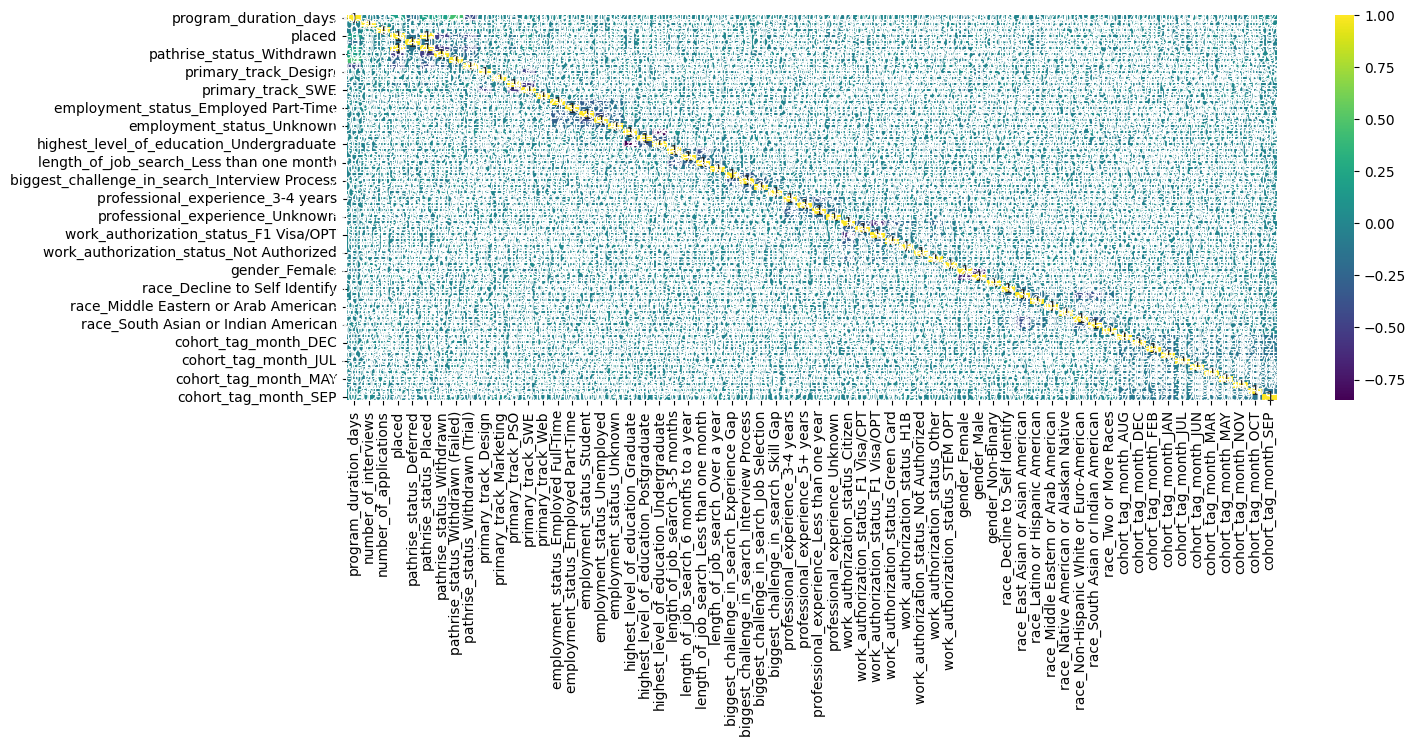

In [326]:
plt.figure(figsize = (15,5))
sns.heatmap(df_reset.corr(),cmap='viridis',annot = True)

In [327]:
df_reset.to_csv('processed_data.csv', index=False)